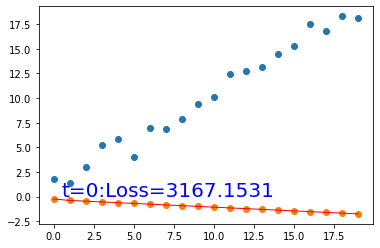

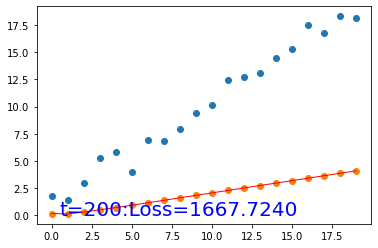

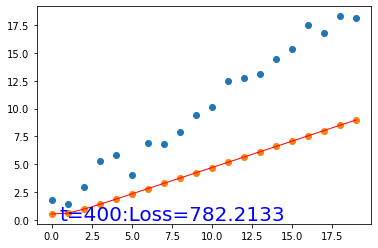

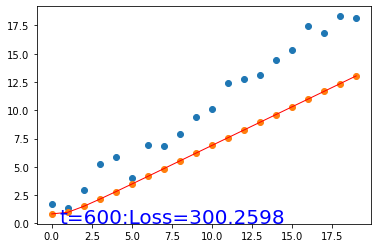

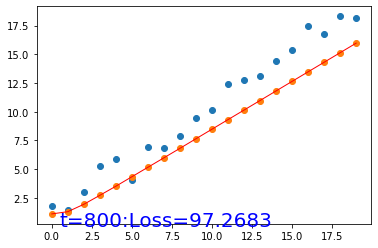

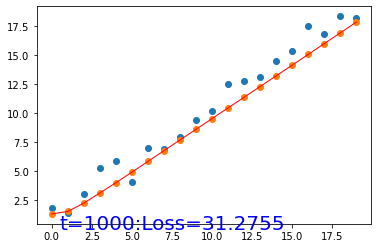

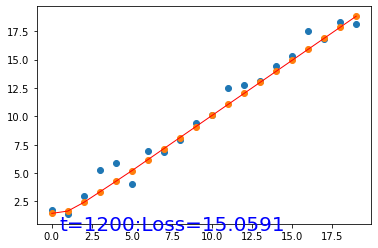

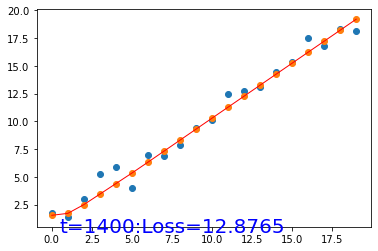

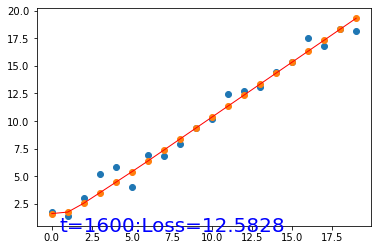

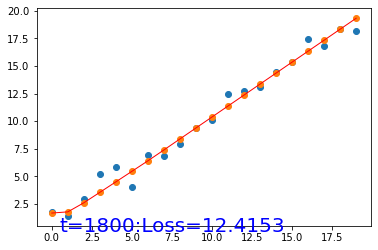

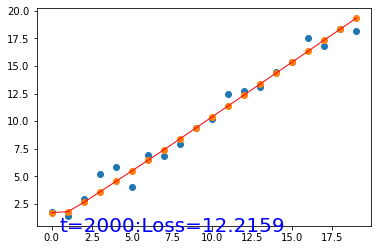

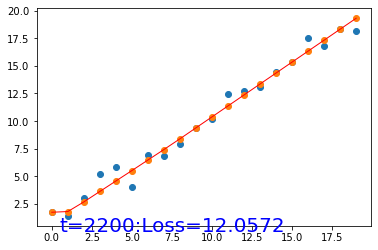

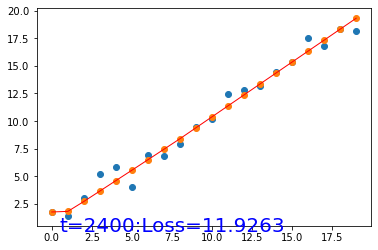

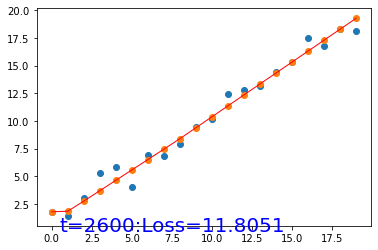

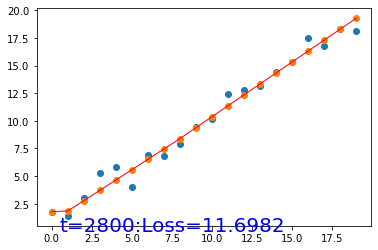

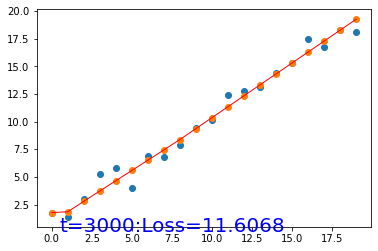

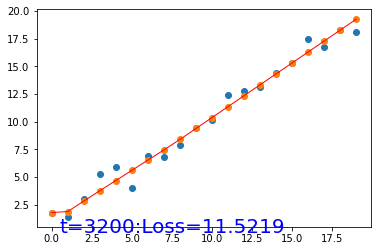

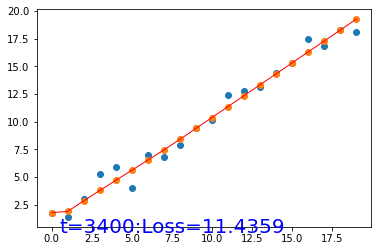

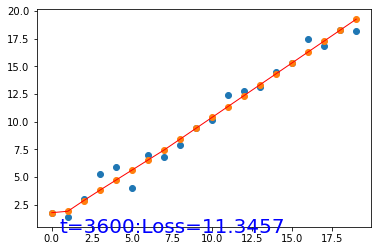

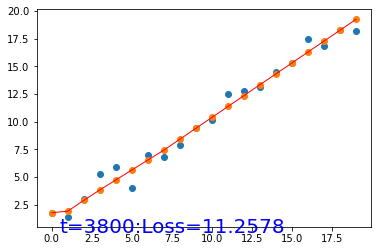

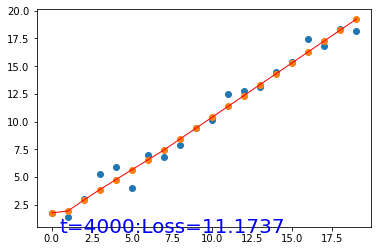

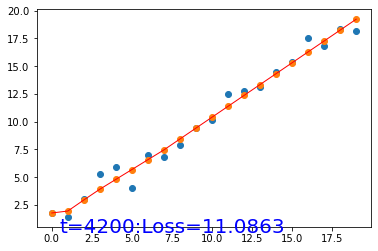

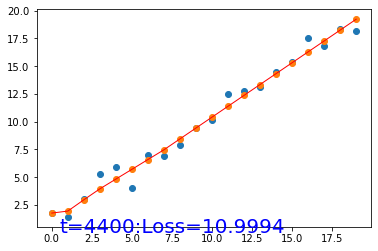

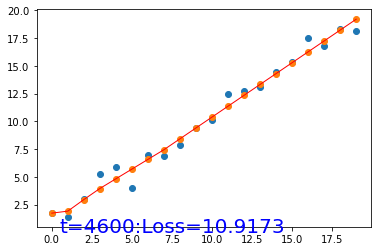

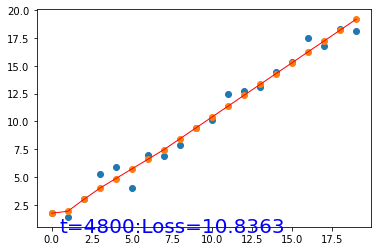

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension. # N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension. 
N, D_in, H, D_out = 20, 1, 64, 1
# Create random input and output data
np.random.seed(0)
x = torch.tensor(np.arange(0,N,1).reshape(N,D_in),dtype=torch.float32) #20*1
y = x +torch.tensor(np.random.randn(N,D_out), dtype=torch.float32) #20*1
# Use the nn package to define our model and loss function. 
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H), 
    torch.nn.ReLU(), 
    torch.nn.Linear(H, D_out), 
)
loss_fn = torch.nn.MSELoss(reduction='sum')
# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use Adam; the optim package contains many other
# optimization algorithms. The first argument to the Adam constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(5000):
    # Forward pass: compute predicted y by passing x to the model. 
    y_pred = model(x)
    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % 200 == 0:
        #y_pred=model.predict(x)
        plt.cla()
        plt.scatter(x.data.numpy(),y.data.numpy())
        plt.scatter(x.data.numpy(),y_pred.data.numpy())
        plt.plot(x.data.numpy(),y_pred.data.numpy(),'r-',lw=1, label="plot figure")
        plt.text(0.5, 0, 't=%d:Loss=%.4f' % (t, loss), fontdict={'size': 20, 'color': 'blue'})
        plt.show()
    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details. 
    optimizer.zero_grad()
    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()
    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()